In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
# from __future__ import division

%matplotlib inline
seaborn.set()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

G:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
G:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
G:\Anaconda3\lib\site

In [2]:
# 确诊数据导入
f_confirm = open(r'time_series_covid19_confirmed_global.csv',encoding = "utf-8")
data_confirm = pd.read_csv(f_confirm,header=None)

In [3]:
# 整理原csv的格式，并提取所需信息，计算R0
def formatTransform(data):
    # 修改日期的格式
    rows,cols = data.shape
    for col in range(4,cols):
        ls_date = data.iloc[0,col].split('/')
        data.iloc[0,col] = '20{}/{}/{}'.format(ls_date[2],ls_date[0],ls_date[1])
    
    # 整合整个国家的信息
    data.drop([0,2,3],axis=1,inplace=True)  # 删除州列和经纬度列
    country = data.iloc[:,0].drop_duplicates(keep='first')   # 保存国家名
    data.iloc[1:,1:] = data.iloc[1:,1:].astype('int64')
    data = data.groupby(1).transform(sum)   # 把原本按州分列的信息按国家汇总
    data.insert(0,0,country)                # 还原国家名
    # 整理索引
    data.columns = data.iloc[0,:]
    data.drop([0],axis=0,inplace=True)
    data = data.reset_index(drop=True)
    data = data[data['Country/Region'].notnull()]
    return data

In [4]:
# 带入函数，整理格式
data_confirm = formatTransform(data_confirm)
data_confirm

,Country/Region,2020/1/22,2020/1/23,2020/1/24,2020/1/25,2020/1/26,2020/1/27,2020/1/28,2020/1/29,2020/1/30,...,2021/1/16,2021/1/17,2021/1/18,2021/1/19,2021/1/20,2021/1/21,2021/1/22,2021/1/23,2021/1/24,2021/1/25
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672
1,Albania,0,0,0,0,0,0,0,0,0,...,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812
2,Algeria,0,0,0,0,0,0,0,0,0,...,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854
3,Andorra,0,0,0,0,0,0,0,0,0,...,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596
4,Angola,0,0,0,0,0,0,0,0,0,...,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Vietnam,0,2,2,2,2,2,2,2,2,...,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549
269,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884
270,Yemen,0,0,0,0,0,0,0,0,0,...,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118
271,Zambia,0,0,0,0,0,0,0,0,0,...,36074,37605,38207,39515,40949,42213,43333,44592,45337,46146


<AxesSubplot:xlabel='0'>

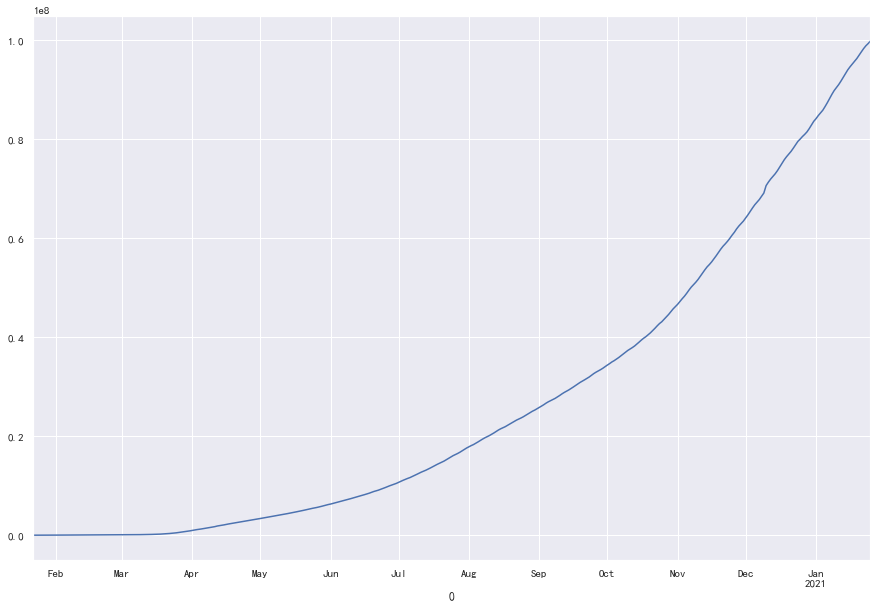

In [5]:
data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)
plt.figure(figsize=(15,10))
data_global.plot()

In [6]:
data_global

0
2020-01-22         557
2020-01-23         655
2020-01-24         941
2020-01-25        1433
2020-01-26        2118
                ...   
2021-01-21    97543730
2021-01-22    98202066
2021-01-23    98769454
2021-01-24    99215513
2021-01-25    99724268
Length: 370, dtype: object

In [7]:
# 政策数据导入
f_policy = open(r'OxCGRT_latest.csv',encoding="utf-8")
data_policy = pd.read_csv(f_policy)

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# 对政策指标的二值化更改
# 封闭措施
# C1
data_policy['C1'] = 0
data_policy['C1'][data_policy['C1_School closing']<=1.0] = 0
data_policy['C1'][data_policy['C1_School closing']>=2.0] = 1
# C2
data_policy['C2'] = 0
data_policy['C2'][data_policy['C2_Workplace closing']<=1.0] = 0
data_policy['C2'][data_policy['C2_Workplace closing']>=2.0] = 1
# C3
data_policy['C3'] = 0
data_policy['C3'][data_policy['C3_Cancel public events']>=1.0] = 1
# C4
data_policy['C4'] = 0
data_policy['C4'][data_policy['C4_Restrictions on gatherings']<=3.0] = 0
data_policy['C4'][data_policy['C4_Restrictions on gatherings']>=4.0] = 1
# C5
data_policy['C5'] = 0
data_policy['C5'][data_policy['C5_Close public transport']<=1.0] = 0
data_policy['C5'][data_policy['C5_Close public transport']>=2.0] = 1
# C6
data_policy['C6'] = 0
data_policy['C6'][data_policy['C6_Stay at home requirements']<=1.0] = 0
data_policy['C6'][data_policy['C6_Stay at home requirements']>=2.0] = 1
# C7
data_policy['C7'] = 0
data_policy['C7'][data_policy['C7_Restrictions on internal movement']<=1.0] = 0
data_policy['C7'][data_policy['C7_Restrictions on internal movement']>=2.0] = 1
# C8
data_policy['C8'] = 0
data_policy['C8'][data_policy['C8_International travel controls']<=1.0] = 0
data_policy['C8'][data_policy['C8_International travel controls']>=2.0] = 1

# 经济政策
# E1
data_policy['E1'] = 0
data_policy['E1'][data_policy['E1_Income support']>=1.0] = 1
# E2
data_policy['E2'] = 0
data_policy['E2'][data_policy['E2_Debt/contract relief']<=1.0] = 0
data_policy['E2'][data_policy['E2_Debt/contract relief']>=2.0] = 1
# E3
data_policy['E3'] = 0
data_policy['E3'][data_policy['E3_Fiscal measures']<1e+07] = 0
data_policy['E3'][data_policy['E3_Fiscal measures']>=1e+07] = 1
# E4
data_policy['E4'] = 0
data_policy['E4'][data_policy['E4_International support']<1e+05] = 0
data_policy['E4'][data_policy['E4_International support']>=1e+05] = 1

# 卫生系统政策
# H1
data_policy['H1'] = 0
data_policy['H1'][data_policy['H1_Public information campaigns']<=1.0] = 0
data_policy['H1'][data_policy['H1_Public information campaigns']>=2.0] = 1
# H2
data_policy['H2'] = 0
data_policy['H2'][data_policy['H2_Testing policy']<=1.0] = 0
data_policy['H2'][data_policy['H2_Testing policy']>=2.0] = 1
# H3
data_policy['H3'] = 0
data_policy['H3'][data_policy['H3_Contact tracing']<=1.0] = 0
data_policy['H3'][data_policy['H3_Contact tracing']>=2.0] = 1
# H4
data_policy['H4'] = 0
data_policy['H4'][data_policy['H4_Emergency investment in healthcare']<1e+06] = 0
data_policy['H4'][data_policy['H4_Emergency investment in healthcare']>=1e+06] = 1
# H5
data_policy['H5'] = 0
data_policy['H5'][data_policy['H5_Investment in vaccines']<1e+06] = 0
data_policy['H5'][data_policy['H5_Investment in vaccines']>=1e+06] = 1
# H6
data_policy['H6'] = 0
data_policy['H6'][data_policy['H6_Facial Coverings']<=2.0] = 0
data_policy['H6'][data_policy['H6_Facial Coverings']>=3.0] = 1
# H7
data_policy['H7'] = 0
data_policy['H7'][data_policy['H7_Vaccination policy']<=3.0] = 0
data_policy['H7'][data_policy['H7_Vaccination policy']>=4.0] = 1

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\zay\AppD

In [9]:
# 取国家水平的政策数据、筛选时间
data_policy = data_policy[data_policy['Jurisdiction'] == 'NAT_TOTAL']
data_policy['Date'] = pd.to_datetime(data_policy['Date'],format='%Y%m%d')
data_policy = data_policy[data_policy['Date']<='2020-12-31']

In [10]:
# 建立字典，对应政策代号及其中英文名
dic_policyEng = dict()
dic_policyChi = dict()

# 封闭措施
dic_policyEng['C1'] = 'School closing'
dic_policyChi['C1'] = '关闭学校'
dic_policyEng['C2'] = 'Workplace closing'
dic_policyChi['C2'] = '关闭工作场所'
dic_policyEng['C3'] = 'Cancel public events'
dic_policyChi['C3'] = '取消公共活动'
dic_policyEng['C4'] = 'Restrictions on gatherings'
dic_policyChi['C4'] = '限制集会'
dic_policyEng['C5'] = 'Close public transport'
dic_policyChi['C5'] = '关闭公共交通'
dic_policyEng['C6'] = 'Stay at home requirements'
dic_policyChi['C6'] = '居家要求'
dic_policyEng['C7'] = 'Restrictions on internal movement'
dic_policyChi['C7'] = '国内移动限制'
dic_policyEng['C8'] = 'International travel controls'
dic_policyChi['C8'] = '国际旅行控制'

# 经济政策
dic_policyEng['E1'] = 'Income support'
dic_policyChi['E1'] = '收入支持'
dic_policyEng['E2'] = 'Debt/contract relief'
dic_policyChi['E2'] = '债务/合同放宽'
dic_policyEng['E3'] = 'Fiscal measures'
dic_policyChi['E3'] = '财政措施'
dic_policyEng['E4'] = 'International support'
dic_policyChi['E4'] = '给予国际支持'

# 卫生系统政策
dic_policyEng['H1'] = 'Public information campaigns'
dic_policyChi['H1'] = '公共信息宣传'
dic_policyEng['H2'] = 'Testing policy'
dic_policyChi['H2'] = '检测政策'
dic_policyEng['H3'] = 'Contact tracing'
dic_policyChi['H3'] = '接触者追踪'
dic_policyEng['H4'] = 'Emergency investment in healthcare'
dic_policyChi['H4'] = '医疗保健紧急投资'
dic_policyEng['H5'] = 'Investment in vaccines'
dic_policyChi['H5'] = '疫苗投资'
dic_policyEng['H6'] = 'Facial Coverings'
dic_policyChi['H6'] = '口罩政策'
dic_policyEng['H7'] = 'Vaccination Policy'
dic_policyChi['H7'] = '疫苗接种政策'

In [11]:
# 政策编号列表
ls_code = (dic_policyEng.keys())

In [12]:
data_policy['policyExists'] = 0
for code in ls_code:
    data_policy['policyExists'] = data_policy['policyExists'] + data_policy[code]

data_policy['policyExists'][data_policy['policyExists']>0] = 1

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
# 国家名列表
ls_country = list(data_policy['CountryName'].drop_duplicates())

In [14]:
def firstPolicyDate(country):
    data_country = data_policy[data_policy['CountryName']==country]
    data_firstPolicyDate = pd.DataFrame()
    row = data_country.shape[0]
    for i in range(row):
        if data_country['policyExists'].iloc[i] == 1:
            data_firstPolicyDate['CountryName'] = [country]
            data_firstPolicyDate['Date'] = [data_policy['Date'].iloc[i]]
            break
    return data_firstPolicyDate

In [15]:
data_Date = pd.DataFrame()
for country in ls_country:
    data_Date = data_Date.append(firstPolicyDate(country))
data_Date = data_Date.sort_values(by='Date')
data_Date.to_csv('引入政策国家顺序_seperate.csv',index=False,sep=',',encoding="utf_8_sig")
data_Date

,CountryName,Date
0,Slovak Republic,2020-01-01
0,Hong Kong,2020-01-01
0,Bolivia,2020-01-01
0,Macao,2020-01-01
0,Mongolia,2020-01-01
...,...,...
0,Mozambique,2020-03-19
0,Sierra Leone,2020-03-21
0,Dominica,2020-03-22
0,Vanuatu,2020-03-26


In [16]:
ls_firstDate = list(data_Date['Date'].drop_duplicates())
len(ls_firstDate)

59

In [17]:
f_R0 = open(r'各国R0.csv',encoding = "utf-8")
data_R0 = pd.read_csv(f_R0)

In [18]:
data_R0

,时间,国家中文名,国家英文名,累计确诊,累计死亡,累计治愈,新增确诊,新增死亡,新增治愈,当日在院治疗人数,当日入院率,当日移出率,R0
0,2020/1/22,阿富汗,Afghanistan,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
1,2020/1/23,阿富汗,Afghanistan,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
2,2020/1/24,阿富汗,Afghanistan,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
3,2020/1/25,阿富汗,Afghanistan,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
4,2020/1/26,阿富汗,Afghanistan,0,0,0,0,0,0,0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71035,2021/1/21,津巴布韦,Zimbabwe,30047,917,19569,639,38,316,9561,0.068887,0.038163,1.030724
71036,2021/1/22,津巴布韦,Zimbabwe,30523,962,21080,476,45,1511,8481,0.049786,0.162744,0.887041
71037,2021/1/23,津巴布韦,Zimbabwe,31007,974,21377,484,12,297,8656,0.057069,0.036434,1.020634
71038,2021/1/24,津巴布韦,Zimbabwe,31320,1005,22250,313,31,873,8065,0.036160,0.104436,0.931724


In [19]:
data_sequence = pd.DataFrame()
data_sequence['Date'] = data_Date['Date'].drop_duplicates().reset_index(drop=True)
data_sequence['国家或地区英文名'] = 0
data_sequence['国家或地区中文名'] = 0
for date in ls_firstDate:
    countriesEng = ''
    countriesChi = ''
    subdata = data_Date[data_Date['Date']==date]
    for row in range(subdata.shape[0]):
        try:
            countryEng = subdata['CountryName'].iloc[row]
            print(countryEng)
            if countryEng == 'Slovak Republic':
                countryEng = 'Slovakia'

            if countryEng == 'Hong Kong':
                countryChi = '香港'
            elif countryEng == 'Macao':
                countryChi = '澳门'
            elif countryEng == 'Taiwan':
                countryChi = '台湾'
            elif countryEng == 'Czech Republic':
                countryChi = '捷克共和国'
            elif countryEng == 'South Korea':
                countryChi = '韩国'
            elif countryEng == 'United States':
                countryChi = '美国'
            elif countryEng in ['Bermuda','Kyrgyz Republic','Georgia','Kiribati','United States Virgin Islands','Turkmenistan','Tonga','Guam','Cape Verde']:
                continue
            else:
                countryChi = data_R0['国家中文名'][data_R0['国家英文名']==countryEng]
                countryChi = countryChi.iloc[0]
            countriesEng = countriesEng + ',' + countryEng
            countriesChi = countriesChi + ',' + countryChi
        except:
            countriesEng = countriesEng
            countriesChi = countriesChi
    countriesEng = countriesEng.strip(',')
    countriesChi = countriesChi.strip(',')
    data_sequence['国家或地区英文名'][data_sequence['Date']==date] = countriesEng
    data_sequence['国家或地区中文名'][data_sequence['Date']==date] = countriesChi
data_sequence.to_csv('引入政策国家顺序.csv',index=False,sep=',',encoding="utf_8_sig")

Slovak Republic
Hong Kong
Bolivia
Macao
Mongolia
Singapore
China
Brunei
Turkey
Malaysia
Taiwan
Uzbekistan
Colombia
Rwanda
New Zealand
Barbados
Fiji
Costa Rica
Bermuda
Bahrain
Germany
Iceland
Argentina
El Salvador
Bhutan
Nepal
Botswana
Philippines
France
Australia
Malta
Portugal
Oman
Czech Republic
Hungary
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Cuba
Georgia
Kyrgyz Republic
South Korea
Bangladesh
Indonesia

In [20]:
data_Date['Count'] = 1
data_Date.index = data_Date['Date']
data_Date = data_Date['Count']
data_Date = data_Date.resample('W').sum()
data_Date

Date
2020-01-05     7
2020-01-12     1
2020-01-19     2
2020-01-26    23
2020-02-02    38
2020-02-09    13
2020-02-16     3
2020-02-23     6
2020-03-01    28
2020-03-08    26
2020-03-15    24
2020-03-22    12
2020-03-29     1
2020-04-05     0
2020-04-12     0
2020-04-19     0
2020-04-26     0
2020-05-03     0
2020-05-10     0
2020-05-17     0
2020-05-24     0
2020-05-31     0
2020-06-07     0
2020-06-14     0
2020-06-21     0
2020-06-28     0
2020-07-05     0
2020-07-12     0
2020-07-19     0
2020-07-26     0
2020-08-02     0
2020-08-09     1
Freq: W-SUN, Name: Count, dtype: int64

Text(0.5, 1.0, '每周初次引入疫情相关政策国家数量')

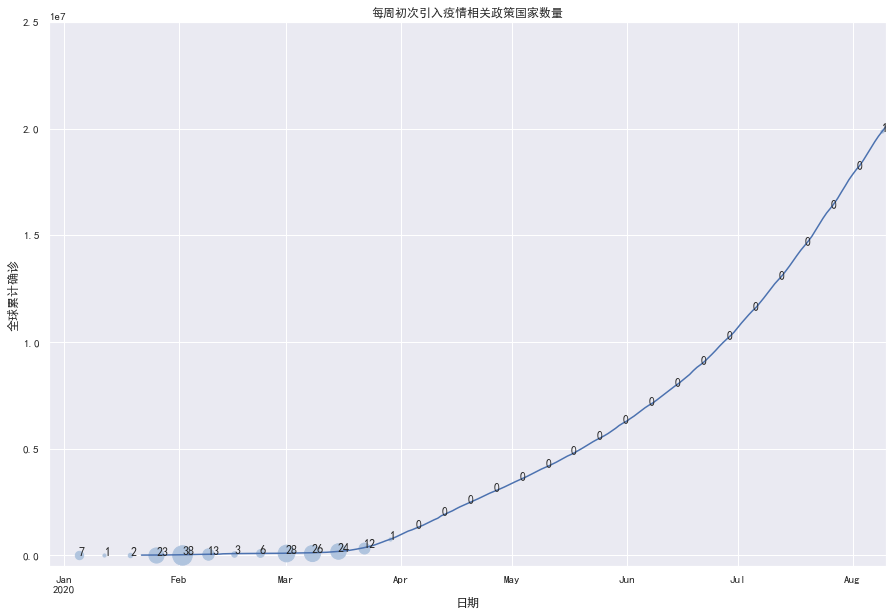

In [21]:
startdate = pd.to_datetime('2019-12-28')
enddate = pd.to_datetime('2020-08-10')

data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)
plt.figure(figsize=(15,10))
data_global.plot()

for date in list(data_Date.index):
    date = pd.to_datetime(str(date))
    size = int(data_Date[date])
    try:
        plt.scatter(date,data_global[date],s=10*size,c='lightsteelblue')
        plt.text(date,data_global[date],size)
    except:
        plt.scatter(date,0,s=10*size,c='lightsteelblue')
        plt.text(date,0,size)
    if date == pd.to_datetime('2020-08-09'):
        break
    
plt.xlim(startdate,enddate)
plt.ylim(-5e5,2.5e7)
plt.xlabel('日期')
plt.ylabel('全球累计确诊')
plt.title('每周初次引入疫情相关政策国家数量')

In [22]:
# 确诊50数据导入
f_50 = open(r'确诊50日期.csv',encoding = "utf-8")
data_50 = pd.read_csv(f_50)
data_50

,Country/Region,50Date
0,Afghanistan,2020-03-25
1,Albania,2020-03-16
2,Algeria,2020-03-16
3,Andorra,2020-03-19
4,Angola,2020-05-18
...,...,...
162,Venezuela,2020-03-21
163,Vietnam,2020-03-14
164,Yemen,2020-05-10
165,Zambia,2020-04-17


In [23]:
data_50['Count'] = 1
data_50.sort_values(by='50Date')
data_50['50Date'] = pd.to_datetime(data_50['50Date'])
data_50.index = data_50['50Date']
data_50 = data_50['Count']
data_50 = data_50.resample('W').sum()
data_50

50Date
2020-01-26     1
2020-02-02     0
2020-02-09     0
2020-02-16     2
2020-02-23     2
2020-03-01     5
2020-03-08    17
2020-03-15    28
2020-03-22    37
2020-03-29    14
2020-04-05    12
2020-04-12     5
2020-04-19     8
2020-04-26     6
2020-05-03     3
2020-05-10     3
2020-05-17     3
2020-05-24     4
2020-05-31     1
2020-06-07     2
2020-06-14     2
2020-06-21     1
2020-06-28     1
2020-07-05     2
2020-07-12     0
2020-07-19     0
2020-07-26     1
2020-08-02     1
2020-08-09     0
2020-08-16     0
2020-08-23     0
2020-08-30     0
2020-09-06     0
2020-09-13     0
2020-09-20     0
2020-09-27     0
2020-10-04     0
2020-10-11     0
2020-10-18     0
2020-10-25     0
2020-11-01     1
2020-11-08     0
2020-11-15     0
2020-11-22     0
2020-11-29     0
2020-12-06     0
2020-12-13     0
2020-12-20     0
2020-12-27     0
2021-01-03     3
2021-01-10     1
2021-01-17     1
Freq: W-SUN, Name: Count, dtype: int64

Text(0.5, 1.0, '每周累计确诊达到50人的国家数量')

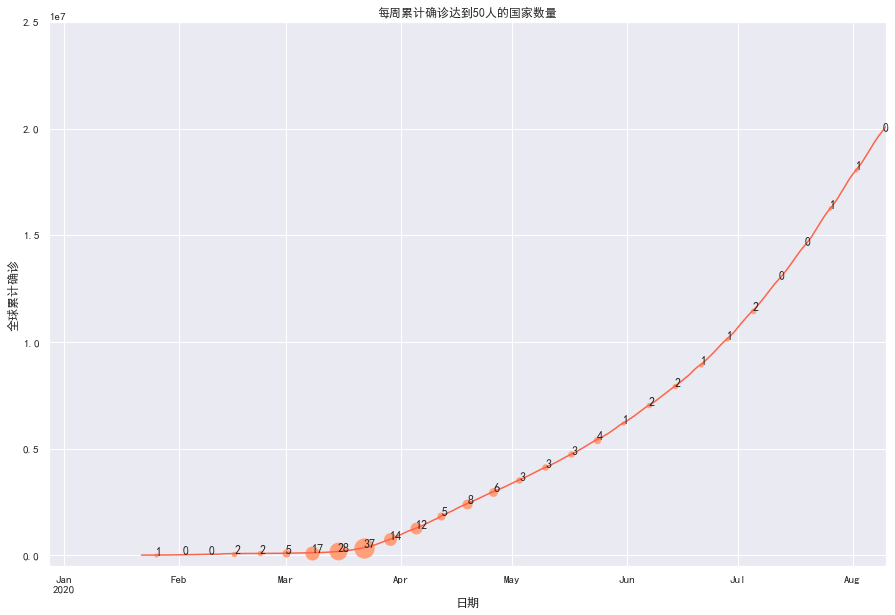

In [24]:
startdate = pd.to_datetime('2019-12-28')
enddate = pd.to_datetime('2020-08-10')

data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)
plt.figure(figsize=(15,10))
data_global.plot(c='tomato')

for date in list(data_50.index):
    date = pd.to_datetime(str(date))
    size = int(data_50[date])
    try:
        plt.scatter(date,data_global[date],s=10*size,c='lightsalmon')
        plt.text(date,data_global[date],size)
    except:
        plt.scatter(date,0,s=10*size,c='lightsalmon')
        plt.text(date,0,size)
    if date == pd.to_datetime('2020-08-09'):
        break
    
plt.xlim(startdate,enddate)
plt.ylim(-5e5,2.5e7)
plt.xlabel('日期')
plt.ylabel('全球累计确诊')
plt.title('每周累计确诊达到50人的国家数量')

Text(0.5, 1.0, '每周初次引入疫情相关政策国家（或地区）数量气泡图')

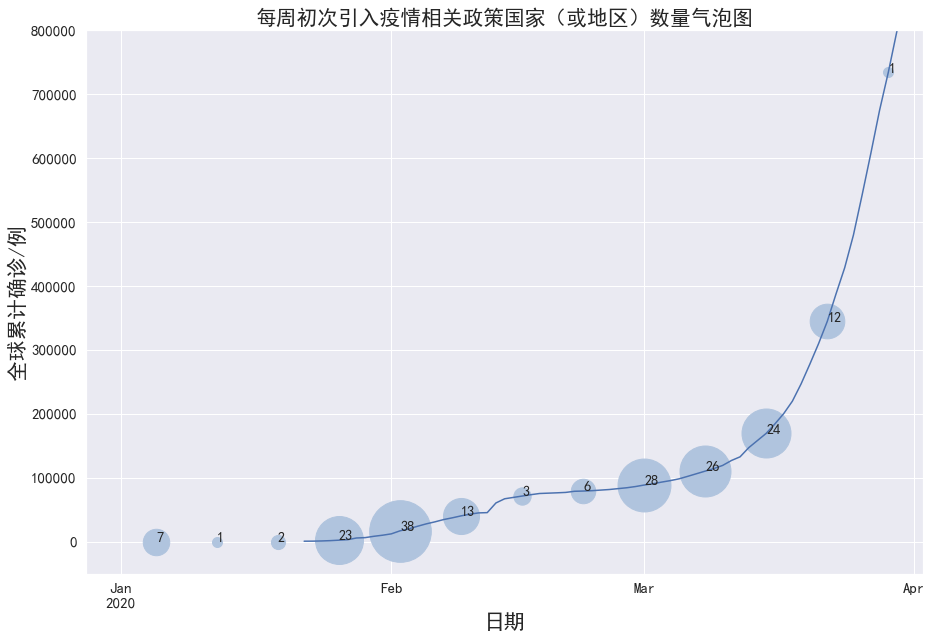

In [25]:
startdate = pd.to_datetime('2019-12-28')
enddate = pd.to_datetime('2020-04-02')

data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)
plt.figure(figsize=(15,10))
data_global.plot()

for date in list(data_Date.index):
    date = pd.to_datetime(str(date))
    size = int(data_Date[date])
    try:
        plt.scatter(date,data_global[date],s=100*size,c='lightsteelblue')
        plt.text(date,data_global[date],size,fontsize='large')
    except:
        plt.scatter(date,0,s=100*size,c='lightsteelblue')
        plt.text(date,0,size,fontsize='large')
    if date == pd.to_datetime('2020-03-29'):
        break
    
plt.xlim(startdate,enddate)
plt.ylim(-5e4,8e5)
plt.tick_params(labelsize=15)
plt.xlabel('日期',fontsize='xx-large')
plt.ylabel('全球累计确诊/例',fontsize='xx-large')
plt.title('每周初次引入疫情相关政策国家（或地区）数量气泡图',fontsize='xx-large')

Text(0.5, 1.0, '每周累计确诊初次达到50人的国家（或地区）数量气泡图')

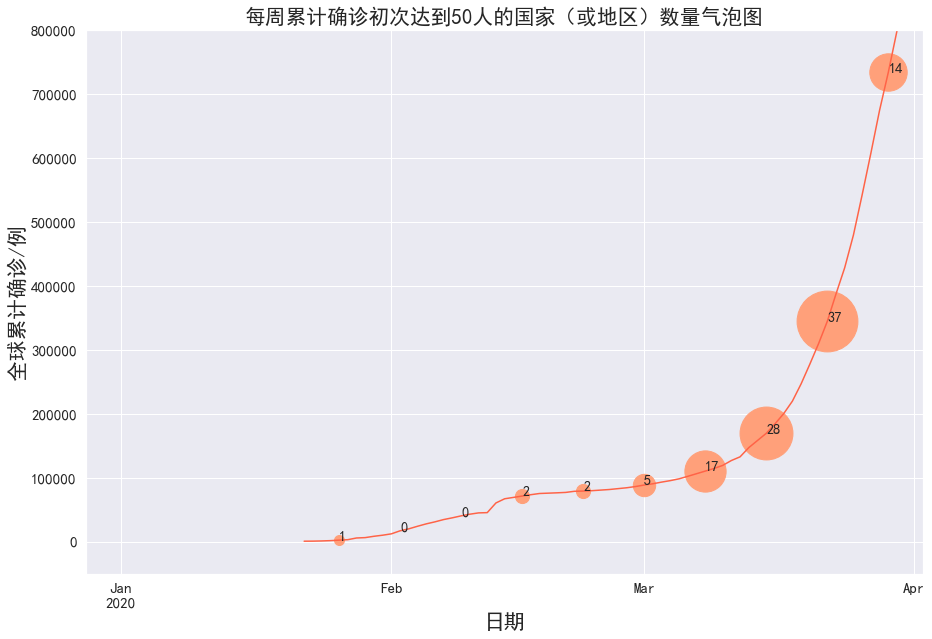

In [26]:
startdate = pd.to_datetime('2019-12-28')
enddate = pd.to_datetime('2020-04-02')

data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)
plt.figure(figsize=(15,10))
data_global.plot(c='tomato')

for date in list(data_50.index):
    date = pd.to_datetime(str(date))
    size = int(data_50[date])
    try:
        plt.scatter(date,data_global[date],s=100*size,c='lightsalmon')
        plt.text(date,data_global[date],size,fontsize='large')
    except:
        plt.scatter(date,0,s=100*size,c='lightsalmon')
        plt.text(date,0,size,fontsize='large')
    if date == pd.to_datetime('2020-03-29'):
        break
    
plt.xlim(startdate,enddate)
plt.ylim(-5e4,8e5)
plt.tick_params(labelsize=15)
plt.xlabel('日期',fontsize='xx-large')
plt.ylabel('全球累计确诊/例',fontsize='xx-large')
plt.title('每周累计确诊初次达到50人的国家（或地区）数量气泡图',fontsize='xx-large')

In [27]:
f_clusters = open('国家聚类_凸聚类.csv',encoding='utf-8_sig')
data_clusters = pd.read_csv(f_clusters)

f_policytime = open('引入政策国家顺序_seperate.csv',encoding='utf-8_sig')
data_policytime = pd.read_csv(f_policytime)

f_50 = open('确诊50日期.csv',encoding='utf-8_sig')
data_50 = pd.read_csv(f_50)

In [28]:
data_barPolicy = pd.DataFrame()
data_barPolicy['Date'] = data_policytime['Date'].drop_duplicates()
ls_color = ['coral','gold','yellowgreen','cornflowerblue','slategrey']
for i in range(5):
    data_barPolicy[ls_color[i]] = 0
for date in data_barPolicy['Date']:
    subdata = data_policytime[data_policytime['Date']==date]
    for country in subdata['CountryName']:
        color = data_clusters['color'][data_clusters['CountryName']==country].iloc[0]
        data_barPolicy[color][data_barPolicy['Date']==date] = data_barPolicy[color][data_barPolicy['Date']==date].iloc[0] + 1
data_barPolicy

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,coral,gold,yellowgreen,cornflowerblue,slategrey
0,2020-01-01,0,0,3,0,2
5,2020-01-02,0,0,1,0,0
6,2020-01-05,0,0,1,0,0
7,2020-01-06,0,0,1,0,0
8,2020-01-14,0,0,1,0,0
9,2020-01-16,0,0,1,0,0
10,2020-01-20,0,0,1,0,0
11,2020-01-21,0,3,0,0,0
14,2020-01-22,0,3,4,0,0
21,2020-01-23,0,2,2,0,0


In [29]:
data_barPolicy['Date'] = pd.to_datetime(data_barPolicy['Date'])

Text(0.5, 1.0, '每日初次引入疫情相关政策国家（或地区）数量')

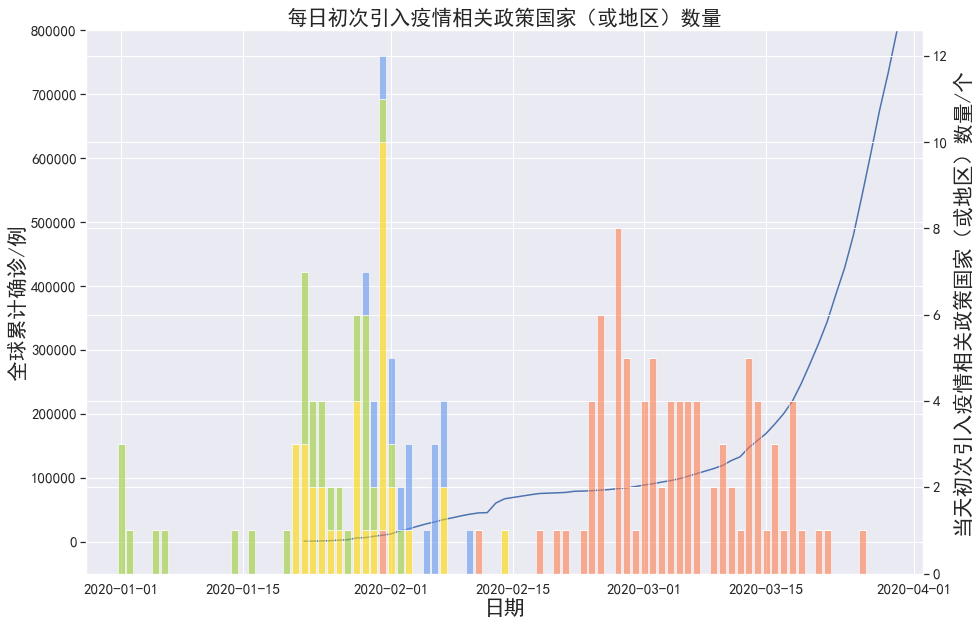

In [34]:
startdate = pd.to_datetime('2019-12-28')
enddate = pd.to_datetime('2020-04-02')

data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)

plt.figure(figsize=(15,10))
ax1 = data_global.plot()
ax2 = ax1.twinx()
for i in range(4):
    color = ls_color[i]
    y = data_barPolicy[color]
    if i == 0:
        bottom = np.zeros(data_barPolicy.shape[0])
    else:
        bottom = np.zeros(data_barPolicy.shape[0])
        for j in range(0,i):
            subcolor = ls_color[j]
            bottom += np.array(data_barPolicy[subcolor])
    ax2.bar(data_barPolicy['Date'],y,bottom=bottom,color=color,alpha=0.6)
plt.xlim(startdate,enddate)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.set_ylim(-5e4,8e5)
ax1.set_xlabel('日期',fontsize='xx-large')
ax1.set_ylabel('全球累计确诊/例',fontsize='xx-large')
ax2.set_ylabel('当天初次引入疫情相关政策国家（或地区）数量/个',fontsize='xx-large')
plt.title('每日初次引入疫情相关政策国家（或地区）数量',fontsize='xx-large')

In [31]:
data_bar50 = pd.DataFrame()
data_bar50['Date'] = data_50['50Date'].drop_duplicates()
ls_color = ['coral','gold','yellowgreen','cornflowerblue','slategrey']
for i in range(5):
    data_bar50[ls_color[i]] = 0
for date in data_bar50['Date']:
    subdata = data_50[data_50['50Date']==date]
    for country in subdata['Country/Region']:
        try:
            color = data_clusters['color'][data_clusters['CountryName']==country].iloc[0]
            data_bar50[color][data_bar50['Date']==date] = data_bar50[color][data_bar50['Date']==date].iloc[0] + 1
        except:
            try:
                if country == 'Congo (Kinshasa)':
                    country = 'Democratic Republic of Congo'
                elif country =='Congo (Brazzaville)':
                    country = 'Congo'
                elif country == 'Korea, South':
                    country == 'South Korea'
                elif country == 'US':
                    country = 'United States'
                elif country == 'Taiwan*':
                    country = 'Taiwan'
                color = data_clusters['color'][data_clusters['CountryName']==country].iloc[0]
                data_bar50[color][data_bar50['Date']==date] = data_bar50[color][data_bar50['Date']==date].iloc[0] + 1
            except:
                print(country)
data_bar50

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Korea, South


,Date,coral,gold,yellowgreen,cornflowerblue,slategrey
0,2020-03-25,0,2,0,0,1
1,2020-03-16,5,3,0,0,0
3,2020-03-19,3,2,0,0,0
4,2020-05-18,0,0,0,1,0
6,2020-03-04,0,2,3,0,0
...,...,...,...,...,...,...
150,2020-04-06,1,0,0,0,0
155,2020-04-05,0,0,1,0,0
164,2020-05-10,0,0,0,0,1
165,2020-04-17,1,0,0,0,0


In [32]:
data_bar50['Date'] = pd.to_datetime(data_bar50['Date'])
data_bar50 = data_bar50.sort_values(by='Date')
data_bar50

,Date,coral,gold,yellowgreen,cornflowerblue,slategrey
32,2020-01-22,0,0,1,0,0
132,2020-02-12,0,0,1,0,0
77,2020-02-15,0,0,1,0,0
81,2020-02-20,0,0,0,0,0
75,2020-02-22,0,0,1,0,0
...,...,...,...,...,...,...
15,2020-08-01,1,0,0,0,0
44,2020-10-31,1,0,0,0,0
84,2020-12-31,1,1,0,1,0
53,2021-01-05,0,0,1,0,0


Text(0.5, 1.0, '每日累计确诊达到50人的国家数量')

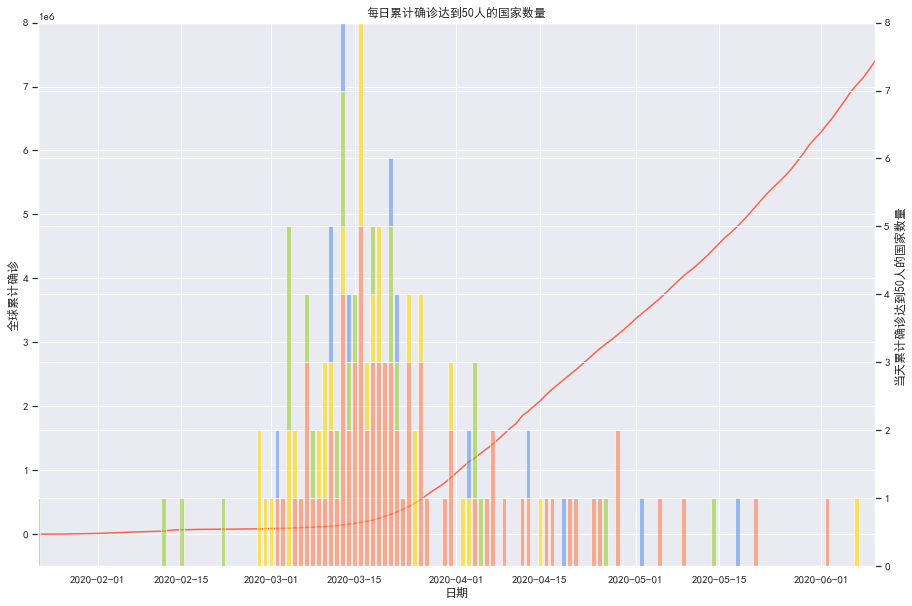

In [33]:
startdate = pd.to_datetime('2020-01-22')
enddate = pd.to_datetime('2020-06-10')

data_global = data_confirm.sum()
data_global = data_global.drop(['Country/Region'])
data_global.index = pd.to_datetime(data_global.index)

plt.figure(figsize=(15,10))
ax1 = data_global.plot(c='tomato')
ax2 = ax1.twinx()
for i in range(4):
    color = ls_color[i]
    y = data_bar50[color]
    if i == 0:
        bottom = np.zeros(data_bar50.shape[0])
    else:
        bottom = np.zeros(data_bar50.shape[0])
        for j in range(0,i):
            subcolor = ls_color[j]
            bottom += np.array(data_bar50[subcolor])
    ax2.bar(data_bar50['Date'],y,bottom=bottom,color=color,alpha=0.6)
plt.xlim(startdate,enddate)
ax1.set_ylim(-5e5,8e6)
ax1.set_xlabel('日期')
ax1.set_ylabel('全球累计确诊')
ax2.set_ylabel('当天累计确诊达到50人的国家数量')
plt.title('每日累计确诊达到50人的国家数量')